In [7]:
from sklearn import metrics
import numpy as np

# confusion = metrics.confusion_matrix(y_test, y_pred)
# print(confusion)

confusion = np.array([[118., 12.], [ 47., 15.]])
confusion2 = np.array([[80, 50], [16, 46]])
def confusion_matrix(matrix):
    TN = matrix[0, 0]
    FP = matrix[0, 1]
    FN = matrix[1, 0]
    TP = matrix[1, 1]
    Accuray = ((TP + TN) / float(TP + TN + FP + FN))
    Precision = TP / float(TP + FP)
    Recall = TP / float(FN + TP)
    F1_score = 2*Precision*Recall/float(Precision+Recall)
    print((Accuray, Precision, Recall, F1_score))
confusion_matrix(confusion)
confusion_matrix(confusion2)

(0.6927083333333334, 0.5555555555555556, 0.24193548387096775, 0.3370786516853933)
(0.65625, 0.4791666666666667, 0.7419354838709677, 0.5822784810126582)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

pima = pd.read_csv('Diabetes_Data_Usage/diabetes.csv')
print(pima.columns)
print(pima.head())

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

X = pima[feature_cols]
# print(X)
# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
logreg2 = LogisticRegression(class_weight={1: 500/268})

In [10]:
from sklearn.model_selection import cross_val_score 
all_accuracies = cross_val_score(estimator=logreg, X=X, y=y, cv=5, scoring='accuracy')
print(all_accuracies)
print(all_accuracies.mean())

all_f1 = cross_val_score(estimator=logreg, X=X, y=y, cv=5, scoring='f1')
print(all_f1)
print(all_f1.mean())

[0.7012987  0.66883117 0.68831169 0.71895425 0.66666667]
0.6888124946948476
[0.5        0.38554217 0.38461538 0.4556962  0.4       ]
0.4251707511643458


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

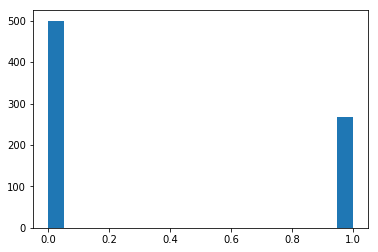

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
import matplotlib.pyplot as plt
plt.hist(y, bins=20)
plt.show()

y_pd_series = pd.Series(y)
y_pd_series.value_counts()

In [13]:
from sklearn import svm, grid_search

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

ImportError: cannot import name 'grid_search' from 'sklearn' (/anaconda3/lib/python3.7/site-packages/sklearn/__init__.py)